## Performance Evaluation  of Regression Model

In [1]:
import numpy as np
import pandas as pd
import sklearn
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('D:\\PycharmProjects\\UdemyML\\data\\housing.csv',delim_whitespace = True, header = None)
col = ['CRIM','ZN','INDUS','CHAS','NOX','RM','AGE','DIS','RAD','TAX','PTRATIO','B','LSTAT','MEDV']
data.columns = col
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [3]:
from sklearn.model_selection import train_test_split

In [4]:
x = data.iloc[:,:-1].values
y = data['MEDV'].values

In [5]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2,random_state = 0)

# here we set random state is 0 (fixed) ..... that means we want the same training and test data every time when we run
# this code or the  model. [once it is splitted it will never change]

In [6]:
x_train[1]

array([1.5876e-01, 0.0000e+00, 1.0810e+01, 0.0000e+00, 4.1300e-01,
       5.9610e+00, 1.7500e+01, 5.2873e+00, 4.0000e+00, 3.0500e+02,
       1.9200e+01, 3.7694e+02, 9.8800e+00])

In [7]:
x_test[1]

array([9.2323e+00, 0.0000e+00, 1.8100e+01, 0.0000e+00, 6.3100e-01,
       6.2160e+00, 1.0000e+02, 1.1691e+00, 2.4000e+01, 6.6600e+02,
       2.0200e+01, 3.6615e+02, 9.5300e+00])

In [8]:
y_train[1]

21.7

In [9]:
y_test[1]

50.0

In [10]:
# if random_state is not set?? .......every time, when we run this code, getting different values (new split values)
x_train1,x_test1,y_train1,y_test1 = train_test_split(x,y,test_size = 0.2)

In [11]:
x_train1[1]

array([  9.72418,   0.     ,  18.1    ,   0.     ,   0.74   ,   6.406  ,
        97.2    ,   2.0651 ,  24.     , 666.     ,  20.2    , 385.96   ,
        19.52   ])

In [12]:
x_test1[1]

array([2.1038e-01, 2.0000e+01, 3.3300e+00, 0.0000e+00, 4.4290e-01,
       6.8120e+00, 3.2200e+01, 4.1007e+00, 5.0000e+00, 2.1600e+02,
       1.4900e+01, 3.9690e+02, 4.8500e+00])

In [13]:
y_train1[1]

17.1

In [14]:
y_test1[1]

35.1

In [15]:
from sklearn.linear_model import LinearRegression

In [16]:
lr = LinearRegression()

In [17]:
lr.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [18]:
y_train_pred = lr.predict(x_train)

In [19]:
y_test_pred = lr.predict(x_test)

## Method 1: Residual Analysis

Residual is just the random data plot (just look like noise without any patterns). This is the ideal state.
Residual Analysis is performed to look at the actual leftover or error in the underlying pattern.[difference between actual and pedicted value]

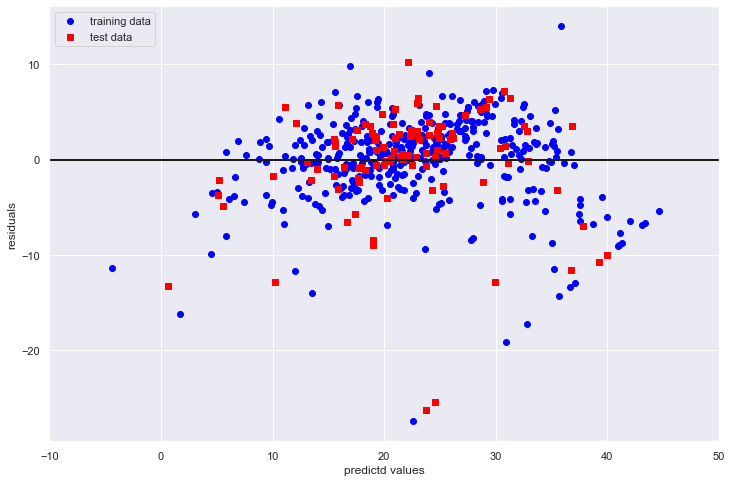

In [20]:
sns.set(style='darkgrid',context='notebook')
plt.figure(figsize = (12,8))
plt.scatter(y_train_pred,y_train_pred - y_train, c = 'blue',marker = 'o',label = 'training data')
plt.scatter(y_test_pred,y_test_pred-y_test,c = 'red',marker = 's',label = 'test data')
plt.xlabel('predictd values')
plt.ylabel('residuals')
plt.hlines(y=0,xmin = -10,xmax = 50,lw = 2, color = 'k')
plt.xlim([-10,50])
plt.legend(loc = 'upper left')
plt.show()

### we can just see that the pattern of training data (blue) is approximately similar to test data(red).

## Method 2: Mean Squared Error (MSE) 
\begin{equation*}
MSE = \frac{1}{n}\sum_{i=1}^{n}\left ( y_{i} -y_{i}^{\alpha }\right )^2 
\end{equation*}
               
    1.The avg value of sum of squared error cost function.
    2.useful for comparing different regression model.
    3.lower the mse better the model performance.

In [21]:
from sklearn.metrics import mean_squared_error

In [22]:
mean_squared_error(y_train,y_train_pred)

19.326470203585725

In [23]:
mean_squared_error(y_test,y_test_pred)

33.44897999767654

#### mse of training data is less as compared to test data. {which shows that our model is not so good}

## Method 3:Coefficient of Determination, $R^{2}$
\begin{equation*}
R^{2} = 1-\frac{SSE}{SST}
\end{equation*}

    *SSE : SUM OF SQUARED ERROR
    *SST : TOTAL SUM OF SQUARES
        > higher Coefficient of Determination value , better the model performance.

In [24]:
from sklearn.metrics import r2_score

In [25]:
r2_score(y_train,y_train_pred)

0.7730135569264234

In [26]:
r2_score(y_test,y_test_pred)

0.5892223849182507

#### r2 of training data is more as compared to test data. {which shows that our model is not so good}

## IMP: What does a near perfect model looks like?

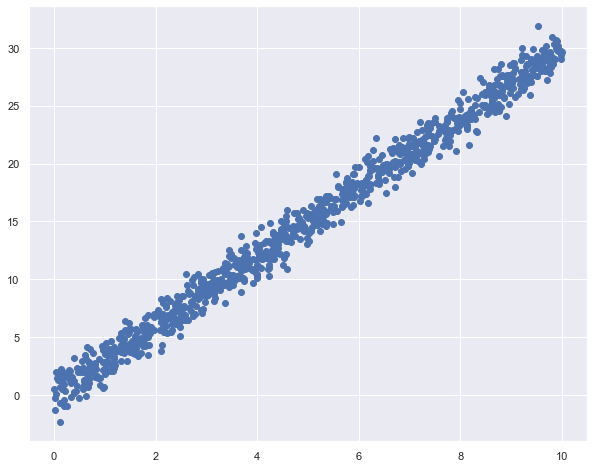

In [27]:
gen_random = np.random.RandomState(0)
x = 10 * gen_random.rand(1000)
y = 3 * x + np.random.randn(1000)
plt.figure(figsize = (10,8))
plt.scatter(x,y)
plt.show()

In [28]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.3,random_state = 0)
model = LinearRegression(fit_intercept = True)
model.fit(x_train.reshape(-1,1),y_train)

y_train_pred = model.predict(x_train.reshape(-1,1))
y_test_pred = model.predict(x_test.reshape(-1,1))

## Residual Analysis:

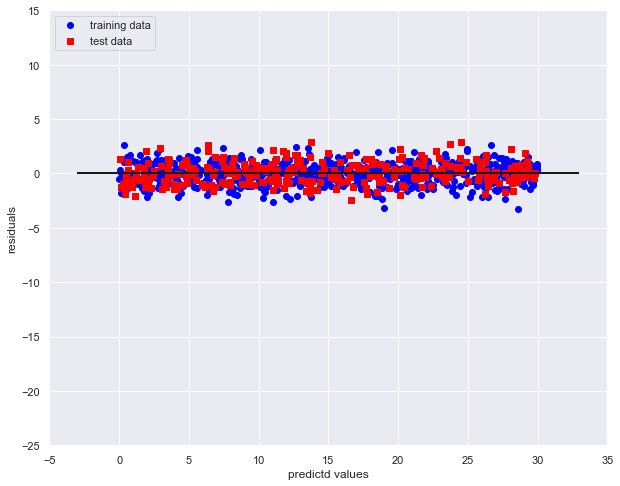

In [29]:
sns.set(style='darkgrid',context='notebook')
plt.figure(figsize = (10,8))
plt.scatter(y_train_pred,y_train_pred - y_train, c = 'blue',marker = 'o',label = 'training data')
plt.scatter(y_test_pred,y_test_pred-y_test,c = 'red',marker = 's',label = 'test data')
plt.xlabel('predictd values')
plt.ylabel('residuals')
plt.hlines(y=0,xmin = -3,xmax = 33,lw = 2, color = 'k')
plt.xlim([-5,35])
plt.ylim([-25,15])
plt.legend(loc = 'upper left')
plt.show()

## MSE:

In [30]:
mean_squared_error(y_train,y_train_pred)

0.8901267247210688

In [31]:
mean_squared_error(y_test,y_test_pred)

0.9770292046388526

## $ R^{2} $ :

In [32]:
r2_score(y_train,y_train_pred)

0.9883317799972071

In [33]:
r2_score(y_test,y_test_pred)

0.9871428992174951

### MSE(test) < MSE(train)  &  $R^{2}$(test) > $R^{2}$(train) 

Model Performance is Good.